<a href="https://colab.research.google.com/github/akarshpyr/Python_practice/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#multiple regression


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/NewspaperData.csv')

In [ ]:
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [ ]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


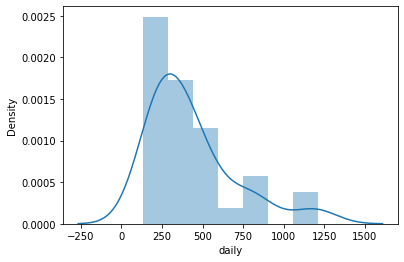

In [ ]:
sns.distplot(data['daily'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


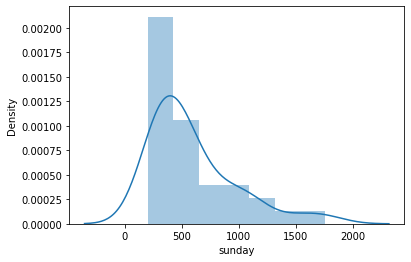

In [ ]:
sns.distplot(data['sunday'])

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model = smf.ols('sunday~daily', data = data).fit()

In [ ]:
model

In [ ]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

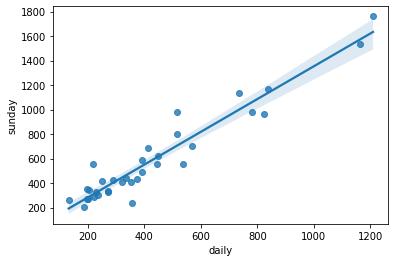

In [ ]:
sns.regplot(x='daily',y='sunday',data=data)

In [ ]:
model.tvalues

Intercept     0.386427
daily        18.934840
dtype: float64

In [ ]:
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [ ]:
model.rsquared

0.9180596895873295

In [ ]:
model.rsquared_adj

0.9154990548869336

In [ ]:
newdata = pd.Series([200,300])


In [ ]:
newdata

0    200
1    300
dtype: int64

In [ ]:
datapre = pd.DataFrame(newdata,columns=['daily'])

In [ ]:
model.predict(datapre)

0    281.778581
1    415.750057
dtype: float64

In [ ]:
df = pd.read_csv('/content/WC_AT.csv')

In [ ]:
df.head(10)

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
5,71.85,21.68
6,80.90,29.08
7,83.40,32.98
8,63.50,11.44
9,73.20,32.22


In [ ]:
model1 = smf.ols('AT~Waist',data=df).fit()

In [ ]:
model1.params


Intercept   -215.981488
Waist          3.458859
dtype: float64

In [ ]:
df.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [ ]:
a = model1.predict(df)

In [ ]:
df['model_pred'] = a

In [ ]:
df

,Waist,AT,model_pred
0,74.75,25.72,42.568252
1,72.60,25.89,35.131704
2,81.80,42.60,66.953210
3,83.95,42.80,74.389758
4,74.65,29.84,42.222366
...,...,...,...
104,100.10,124.00,130.250337
105,93.30,62.20,106.730093
106,101.80,133.00,136.130398
107,107.90,208.00,157.229440


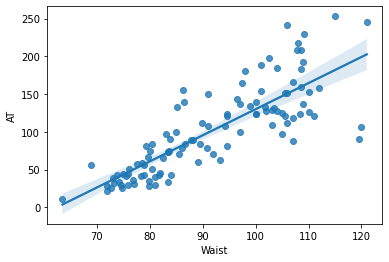

In [ ]:
sns.regplot(x='Waist', y='AT', data=df)

In [ ]:
model1.rsquared_adj

0.6669531256981966

In [ ]:
model1.rsquared

0.670036893052843

In [ ]:
model1.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

In [ ]:
import numpy as np

In [ ]:
SSE = np.sum((df['model_pred']- df['AT'])**2)

In [ ]:
SSE

116981.9860213186

In [ ]:
SSR = np.sum((df['model_pred']-df['AT'].mean())**2)

In [ ]:
SSR

237548.5162025347

In [ ]:
SST = SSR + SSE

In [ ]:
SST

354530.5022238533

In [ ]:
r2 = SSR/SST

In [ ]:
r2

0.670036893052843

In [ ]:
MSE = SSE/(df.count()-2)

In [ ]:
MSE

Waist         1093.289589
AT            1093.289589
model_pred    1093.289589
dtype: float64

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE


Waist         33.06493
AT            33.06493
model_pred    33.06493
dtype: float64

In [ ]:
SSE

116981.9860213186

In [ ]:
newdf = pd.Series([150,200])

In [ ]:
newpre = pd.DataFrame(newdf,columns=['Waist'])

In [ ]:
newpre

,Waist
0,150
1,200


In [ ]:
model1.predict(newpre)

0    302.847421
1    475.790390
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Cars.csv')

In [ ]:
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
sns.set_style(style='darkgrid')

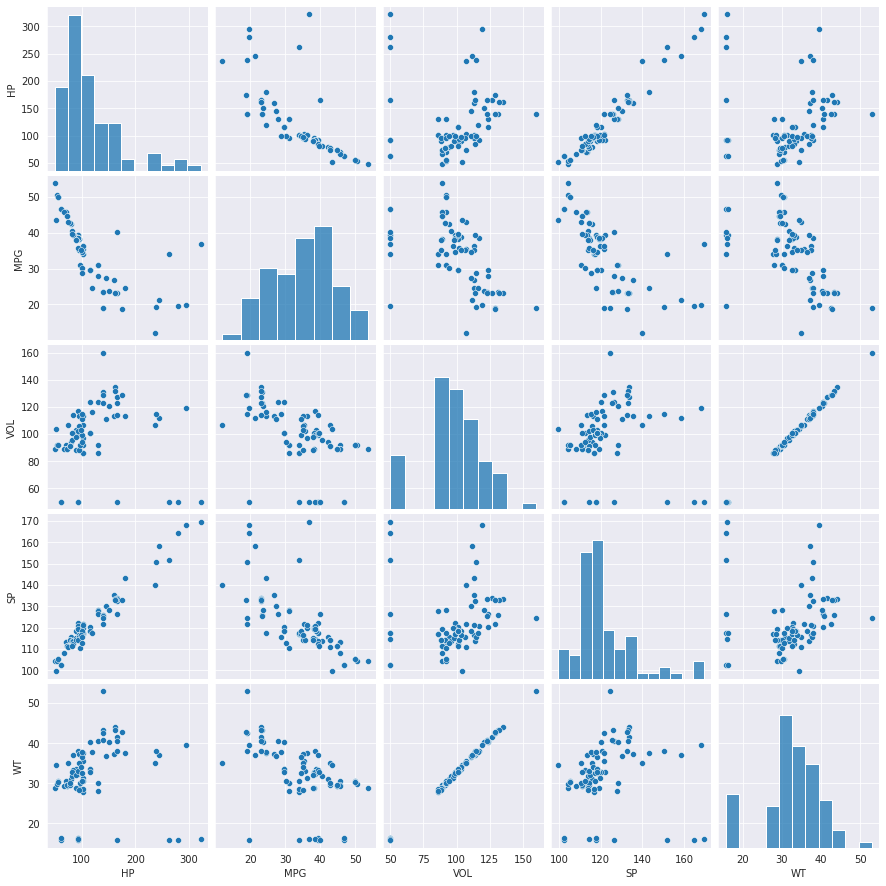

In [ ]:
sns.pairplot(data)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model_a = smf.ols('MPG~SP+HP+VOL',data=data).fit()

In [ ]:
model_a.params

Intercept    29.923389
SP            0.400659
HP           -0.206705
VOL          -0.201651
dtype: float64

In [ ]:
print(model_a.tvalues,'\n',model_a.pvalues)

Intercept    2.068548
SP           2.570678
HP          -5.353199
VOL         -8.928340
dtype: float64 
 Intercept    4.194554e-02
SP           1.207855e-02
HP           8.644870e-07
VOL          1.648229e-13
dtype: float64


In [ ]:
a = model_a.resid
a

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

In [ ]:
SSE = np.sum(a**2)

In [ ]:
SSE

1531.7953244856085

In [ ]:
data

,HP,MPG,VOL,SP,WT,SSE
0,49,53.700681,89,104.185353,28.762059,102.210324
1,55,50.013401,92,105.461264,30.466833,60.164959
2,55,50.013401,92,105.461264,30.193597,60.164959
3,70,45.696322,92,113.461264,30.632114,11.121061
4,53,50.504232,92,104.461264,29.889149,67.810085
...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,245.450421
77,238,19.197888,115,150.576579,37.923113,1.769331
78,263,34.000000,50,151.598513,15.769625,60.577335
79,295,19.833733,119,167.944460,39.423099,57.701934


In [ ]:
data.drop(['SSE'],axis=1)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
vol = smf.ols('VOL~HP+SP+WT',data=data).fit().rsquared

In [ ]:
vif_vol = 1/(1-vol)

In [ ]:
vif_vol

638.8060836592878

In [ ]:
hp = smf.ols('HP~VOL+SP+WT',data=data).fit().rsquared

In [ ]:
vif_hp = 1/(1-hp)

In [ ]:
vif_hp

19.926588974998563

In [ ]:
sp = smf.ols('SP~VOL+HP+WT',data=data).fit().rsquared

In [ ]:
vif_sp = 1/(1-sp)

In [ ]:
wt = smf.ols('WT~VOL+HP+SP',data=data).fit().rsquared

In [ ]:
vif_wt = 1/(1-wt)

In [ ]:
d1 = {'Var': ['VOL',"HP",'SP','WT'],'VIF':[vif_vol,vif_hp,vif_sp,vif_wt]}

In [ ]:
pd.DataFrame(d1)

,Var,VIF
0,VOL,638.806084
1,HP,19.926589
2,SP,20.007639
3,WT,639.533818


In [ ]:
import statsmodels.api as sm

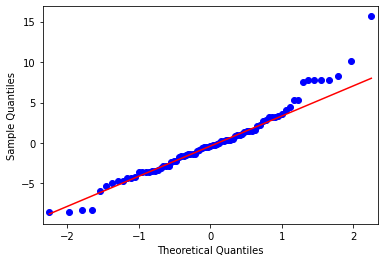

In [ ]:
qq = sm.qqplot(model_a.resid,line='q')

In [ ]:
list(np.where(model_a.resid>10))

[array([ 0, 76])]

In [ ]:
def get_standardized_values(val):
  return((val-val.mean())/val.std())

In [ ]:
get_standardized_values(data['HP'])

0    -1.198826
1    -1.093772
2    -1.093772
3    -0.831137
4    -1.128790
        ...   
76    3.581130
77    2.110374
78    2.548099
79    3.108387
80    2.075356
Name: HP, Length: 81, dtype: float64

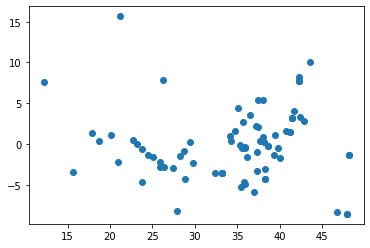

In [ ]:
plt.scatter(model_a.fittedvalues,model_a.resid)

In [ ]:
fig = plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

In [ ]:
fig= sm.graphics.plot_regress_exog(model_a,'VOL',fig=fig)

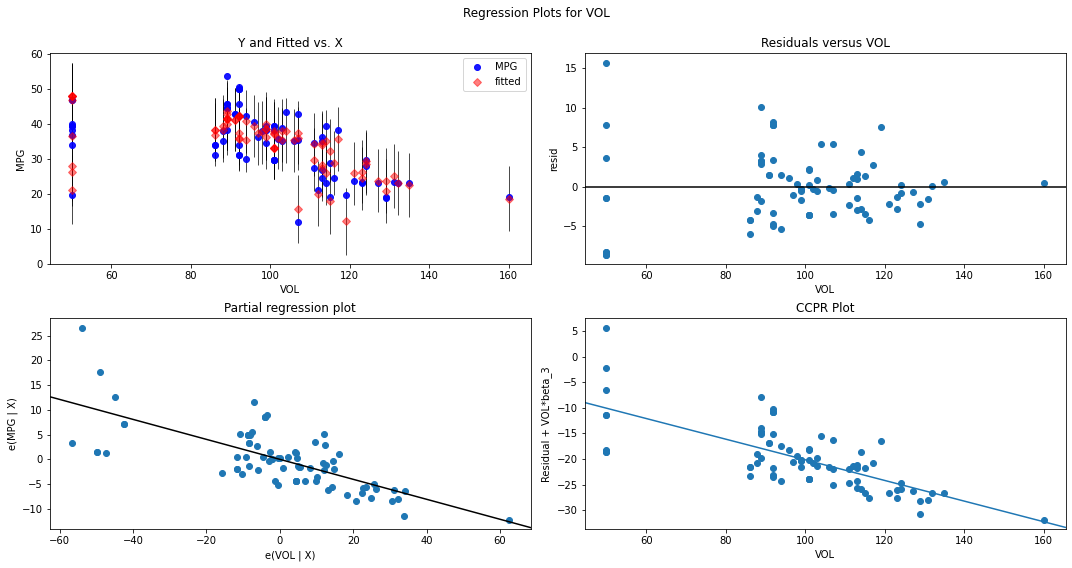

In [ ]:
fig

In [ ]:
mi = model_a.get_influence()
c = mi.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


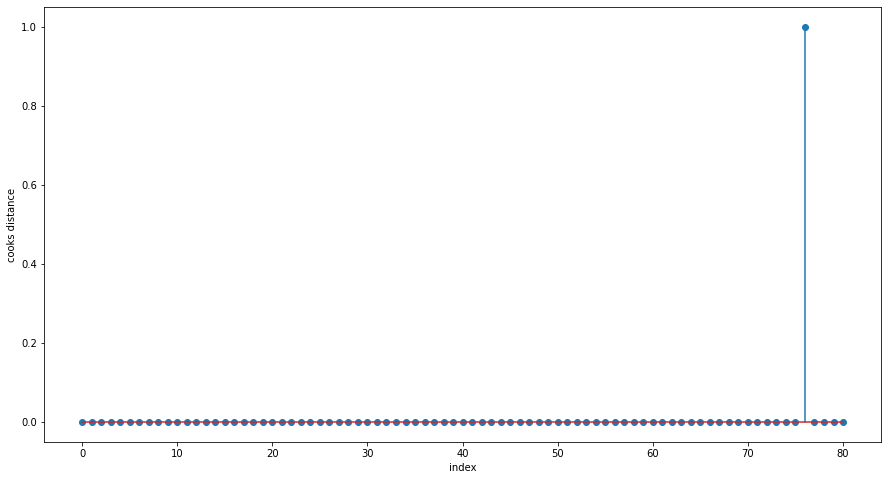

In [ ]:
fig = plt.subplots(figsize=(15,8))
plt.stem(np.arange(len(data)), np.round(c))
plt.xlabel('index'); plt.ylabel('cooks distance')
plt.show()

In [ ]:
np.argmax(c)

76

In [ ]:
np.max(c)

1.3641743869103202

In [ ]:
import statsmodels.graphics.regressionplots as sgr

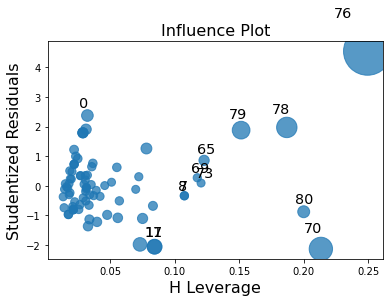

In [ ]:
infl_plot = sgr.influence_plot(model_a)

In [ ]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)


In [ ]:
leverage_cutoff

0.25925925925925924

In [ ]:
data[data.index.isin([70,76])]

,HP,MPG,VOL,SP,WT,SSE
70,280,19.678507,50,164.598513,15.823060,67.781293
76,322,36.900000,50,169.598513,16.132947,245.450421


In [ ]:
data.iloc[65:,]

,HP,MPG,VOL,SP,WT,SSE
65,165,40.050000,50,126.598513,15.712859,12.906491
66,165,23.103172,114,132.484609,37.979956,7.878888
67,165,23.103172,127,133.680223,41.573975,0.441572
68,165,23.103172,123,133.312342,40.472042,1.752227
69,245,21.273708,112,158.300669,37.141733,1.329951
70,280,19.678507,50,164.598513,15.823060,67.781293
71,162,23.203569,135,133.415985,44.013139,0.286064
72,162,23.203569,132,133.140074,43.353123,0.001636
73,140,19.086341,160,124.715241,52.997752,0.157943
74,140,19.086341,129,121.864163,42.618698,22.197695


In [ ]:
cars = pd.read_csv('/content/Cars.csv')

In [ ]:
cars1 = cars.drop(cars.index[[70,76]]).reset_index()

In [ ]:
cars1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [ ]:
cars1.drop(['index'],axis=1)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('/content/claimants.csv')

In [4]:
data


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [6]:
data.drop(['CASENUM'],inplace=True,axis=1)

In [7]:
data

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [9]:
data.dropna(inplace=True)

In [12]:
X= data.iloc[:,1:]
Y= data.iloc[:,0]

In [13]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [14]:
y_pred = classifier.predict(X)

In [15]:
df = {'actual':Y,'Predicted':y_pred}

In [16]:
Table = pd.DataFrame(df)

In [17]:
Table


,actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion = confusion_matrix(Y,y_pred)

In [20]:
confusion

array([[381, 197],
       [123, 395]])

In [21]:
a =381+395

In [22]:
b= 381+197+123+395

In [23]:
Accu = a/b

In [24]:
Accu


0.708029197080292

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

In [28]:
fpr,tpr,thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])

In [34]:
auc = roc_auc_score(Y,y_pred)
auc

0.7108589063606365

In [30]:
import matplotlib.pyplot as plt


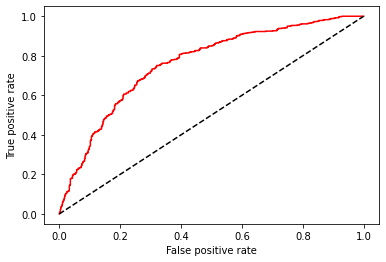

In [33]:
plt.plot(fpr,tpr,color='red',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate');plt.ylabel('True positive rate')
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import scipy.cluster.hierarchy as sch

In [6]:
uni = pd.read_csv('/content/Universities.csv')

In [7]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [8]:
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [9]:
def normf(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [10]:
uni_norm = normf(uni.iloc[:,1:])

In [11]:
uni_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


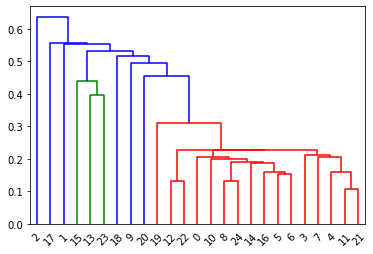

In [12]:
dendrogram = sch.dendrogram(sch.linkage(uni_norm,method='single'))

In [13]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [14]:
yhc = hc.fit_predict(uni_norm)

In [15]:
yhc

array([0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0])

In [16]:
cdf = pd.DataFrame(yhc,columns=['Cluster'])

In [17]:
cdf

,Cluster
0,0
1,3
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [18]:
uni['Cluster_1'] = cdf

In [19]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_1
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [22]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(uni_norm)
  wcss.append(kmeans.inertia_)


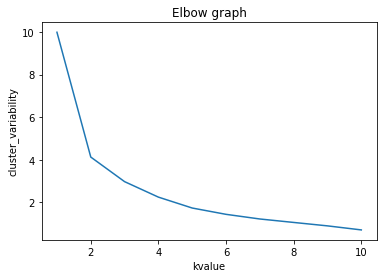

In [23]:
plt.plot(range(1,11),wcss)
plt.title('Elbow graph')
plt.xlabel('kvalue')
plt.ylabel('cluster_variability')
plt.show()

In [24]:
new_cluster = KMeans(n_clusters=4,random_state=43)

In [25]:
new_cluster.fit(uni_norm)

KMeans(n_clusters=4, random_state=43)

In [27]:
a =new_cluster.labels_

In [28]:
uni['kmeansclus'] = a

In [29]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_1,kmeansclus
0,Brown,1310,89,22,13,22704,94,0,2
1,CalTech,1415,100,25,6,63575,81,3,3
2,CMU,1260,62,59,9,25026,72,1,0
3,Columbia,1310,76,24,12,31510,88,0,2
4,Cornell,1280,83,33,13,21864,90,0,0
5,Dartmouth,1340,89,23,10,32162,95,0,2
6,Duke,1315,90,30,12,31585,95,0,2
7,Georgetown,1255,74,24,12,20126,92,0,0
8,Harvard,1400,91,14,11,39525,97,0,2
9,JohnsHopkins,1305,75,44,7,58691,87,0,3


In [30]:
new_cluster.cluster_centers_

array([[0.60487805, 0.69027778, 0.38815789, 0.36315789, 0.24246323,
        0.66333333],
       [0.13780488, 0.14930556, 0.73684211, 0.69736842, 0.02276248,
        0.15833333],
       [0.84552846, 0.85339506, 0.10233918, 0.26315789, 0.45400222,
        0.89259259],
       [0.86585366, 0.82638889, 0.26973684, 0.02631579, 0.95549562,
        0.56666667]])

In [31]:
uni.groupby('kmeansclus').agg(['mean']).reset_index()

,kmeansclus,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_1
,,mean,mean,mean,mean,mean,mean,mean
0,0,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000,0.1
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000,0.5
2,2,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778,0.0
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000,1.5
